# Continuous and Discrete Distributions

### Continuous Distribution

- Normal
- T-Student
- F-distribution
- Logistic distribution
- Lognormal distribution
- Uniform distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
def Distribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):

    plt.plot(x, d1.pdf(x), label=str(legendTxt[0]))
    if d2 != '':
        plt.plot(x, d2.pdf(x), 'r', label=str(legendTxt[1]))
    plt.xlim(xmin, xmax)
    plt.title(tTxt)
    plt.xlabel(xTxt)
    plt.ylabel(yTxt)
    plt.legend()
    plt.grid()
    plt.show()

    
x = np.linspace(-10,10,500)

No handles with labels found to put in legend.


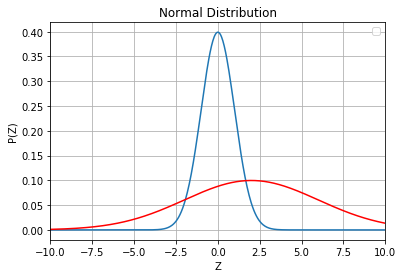

In [3]:
########## Normal

Distribution(stats.norm, stats.norm(loc=2, scale=4),'Normal Distribution', 'Z', 'P(Z)',['',''])

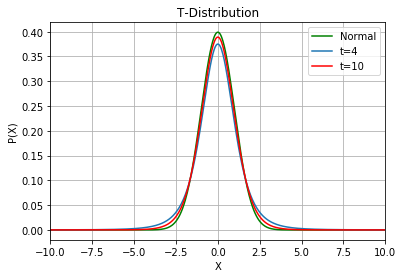

In [4]:
########## T-Student

plt.plot(x, stats.norm.pdf(x), 'g',label='Normal')

Distribution(stats.t(4), stats.t(10), 'T-Distribution', 'X', 'P(X)',['t=4','t=10'])


No handles with labels found to put in legend.


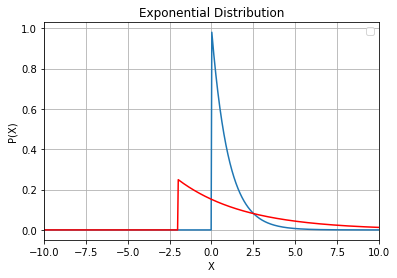

In [5]:
########## Exponential 

Distribution(stats.expon, stats.expon(loc=-2, scale=4),'Exponential Distribution', 'X', 'P(X)',['',''])

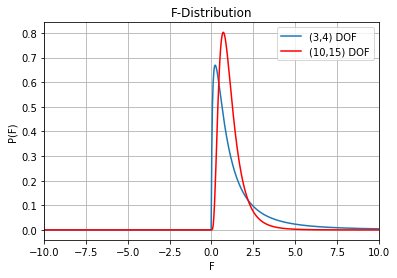

In [7]:
########## F - Distribution

# ... with (3,4) and (10,15) DOF
Distribution(stats.f(3,4), stats.f(10,15), 'F-Distribution', 'F', 'P(F)',['(3,4) DOF', '(10,15) DOF'])



No handles with labels found to put in legend.


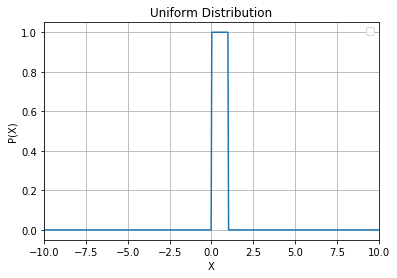

In [9]:
########## Uniform

Distribution(stats.uniform,'' , 'Uniform Distribution', 'X', 'P(X)',['',''])

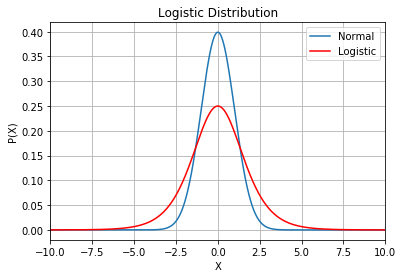

In [10]:
########## Logistic

Distribution(stats.norm, stats.logistic, 'Logistic Distribution', 'X', 'P(X)',['Normal', 'Logistic'])

No handles with labels found to put in legend.


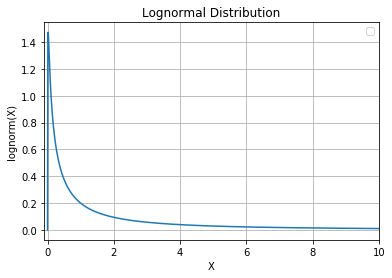

In [15]:
########## Lognormal

x = np.logspace(-9,1,1001)+1e-9
Distribution(stats.lognorm(2), '',  'Lognormal Distribution', 'X', 'lognorm(X)',['',''], xmin=-0.1)

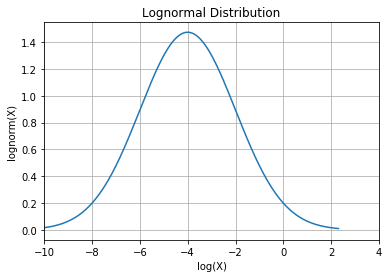

In [18]:
plt.plot(np.log(x), stats.lognorm.pdf(x,2))
plt.xlim(-10, 4)
plt.title('Lognormal Distribution')
plt.xlabel('log(X)')
plt.ylabel('lognorm(X)')
plt.grid()

### Discrete Distribution

- Binomial
- Poisson

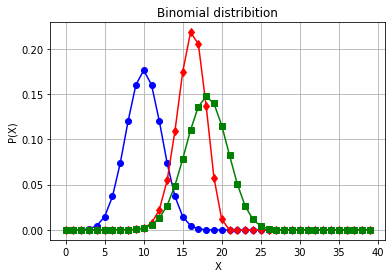

In [22]:
######### Binomial

bd1 = stats.binom(20, 0.5)
bd2 = stats.binom(20, 0.8)
bd3 = stats.binom(30, 0.6)
k = np.arange(40)
plt.plot(k, bd1.pmf(k), 'o-b',label='p=0.5 and n=20')
plt.plot(k, bd2.pmf(k), 'd-r', label='p=0.8 and n=20')
plt.plot(k, bd3.pmf(k), 's-g', label = 'p=0.6 and n=30')
plt.title('Binomial distribition')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()

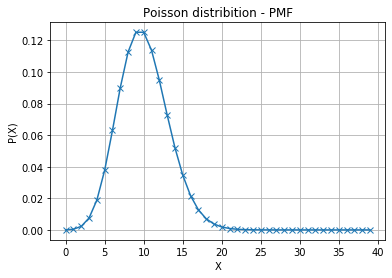

In [23]:
######### Poisson

pd = stats.poisson(10)
plt.plot(k, pd.pmf(k),'x-')
plt.title('Poisson distribition - PMF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()


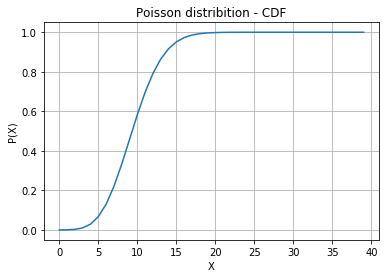

In [27]:
k = np.arange(40)
plt.plot(k, pd.cdf(k))
plt.title('Poisson distribition - CDF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()

### Normal Distribution Aspects



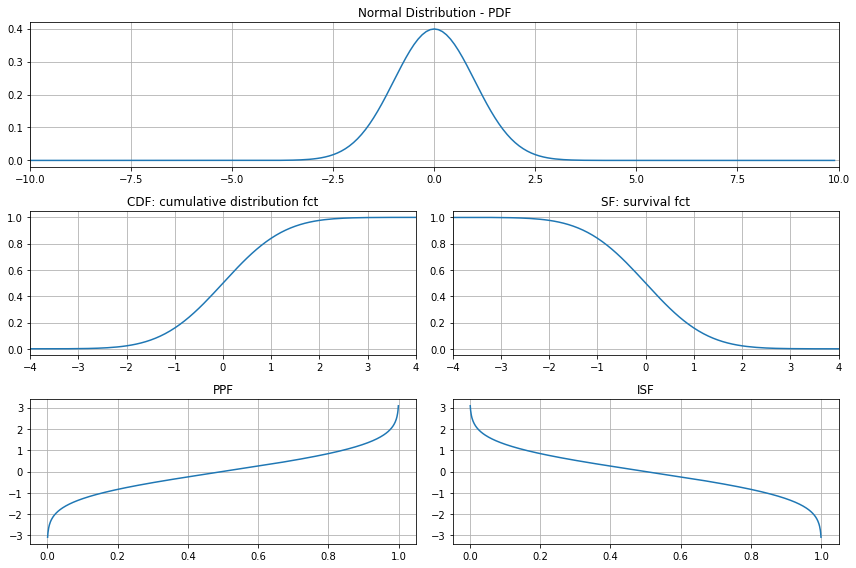

In [30]:
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate

x2 = np.r_[0:1:0.001]

plt.figure(figsize=(12,8))

ax = plt.subplot2grid((3,2),(0,0), colspan=2)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')
plt.grid()

plt.subplot(323)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')
plt.grid()

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF: survival fct')
plt.grid()

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')
plt.grid()

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')
plt.grid()

plt.tight_layout()


plt.show()

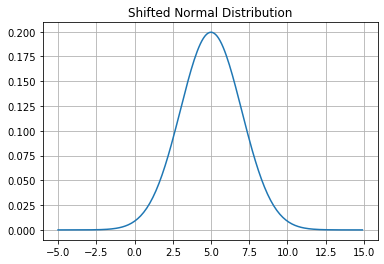

In [32]:
x = np.arange(-5,15,0.1)
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')
plt.grid()

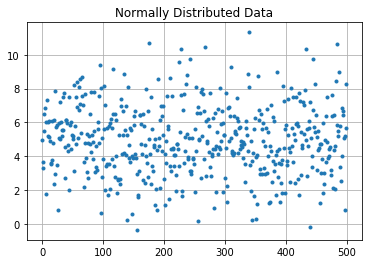

Text(0.5, 1.0, 'Histogram')

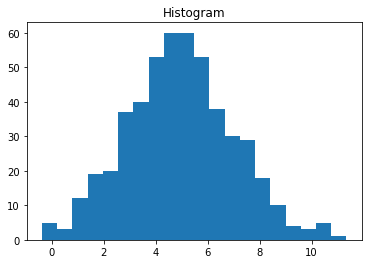

In [35]:
Data = 500
data = stats.norm.rvs(myMean, mySD, size = Data)
plt.plot(data, '.')
plt.title('Normally Distributed Data')
plt.grid()
plt.show()

plt.hist(data,bins=20)
plt.title('Histogram')


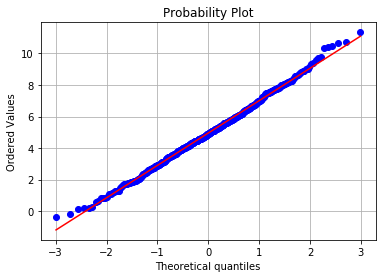

In [37]:
_ = stats.probplot(data, plot=plt)
plt.grid()

In [38]:
# T"normaltest" is based on D’Agostino and Pearson’s test

_, pVal = stats.normaltest(data)

if pVal > 0.05:
    print('The distribution is probably normal')

The distribution is probably normal


In [39]:
# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the data'.format(value, round(cdf*100))))

# For the percentile corresponding to a certain value: 
# the "inverse cumulative distribution function" 
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((1-value)*100, icdf))

With a threshold of 2.00, you get 7% of the data
To get 97.5% of the data, you need a threshold of 8.92.


# Exercises

In [42]:
# 6.1

vector = np.arange(1,11,1)

print('Mean',np.mean(vector))


print('Standard Deviation',np.std(vector,ddof=1))



Mean 5.5
Standard Deviation 3.0276503540974917


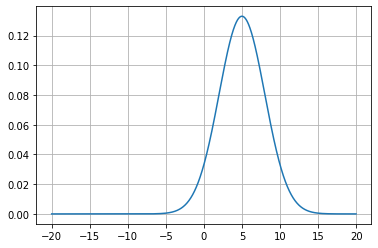

In [68]:
# 6.2

x = np.arange(-20,20,0.01)

nd = stats.norm(5,3) 

plt.plot(x,nd.pdf(x))
plt.grid()

In [69]:
value = 0.05
myMean= 5
mySD = 3
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((value)*100, icdf))

To get 5.0% of the data, you need a threshold of 9.93.


<function matplotlib.pyplot.show(*args, **kw)>

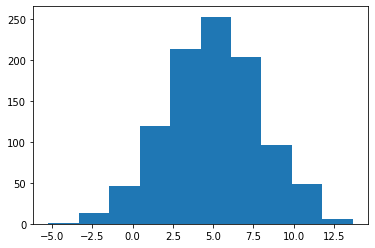

In [71]:
r = nd.rvs(size=1000)

plt.hist(r)
plt.show

In [73]:
nd.ppf([0.05/2,1-0.05/2]) # intervalo contendo 95% dos dados

array([-0.87989195, 10.87989195])

In [74]:
# SD for hip implants

nd = stats.norm()

numSDs = nd.isf(0.0005)

tolerance = 1/numSDs

print(f'The required SD to fulfill both requirements = {tolerance:6.4f} mm')

The required SD to fulfill both requirements = 0.3039 mm


In [86]:
# 6.3

weights = [52,70,65,85,62,83,59]

td = stats.t(len(weights)-1)

alpha = 0.01 # 99% confidente interval

tval = abs(td.ppf(alpha/2)*stats.sem(weights)) #SEM=standard error of the mean

print(f'mean +/- 99%CI = {np.mean(weights):3.1f} +/- {tval:3.1f}')

mean +/- 99%CI = 68.0 +/- 17.2


In [84]:
stats.sem(weights)

17.162056903012893

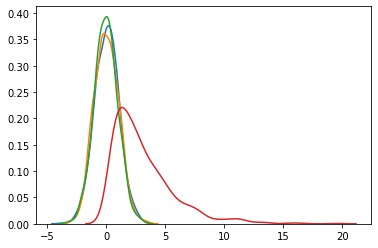

In [91]:
nd = stats.norm(0,1)

numData = 1000

data1 = nd.rvs(numData)

data2 = nd.rvs(numData)

data3 = nd.rvs(numData)


data_total = data1**2+data2**2+data3**2

sns.kdeplot(data1)
sns.kdeplot(data2)
sns.kdeplot(data3)
sns.kdeplot(data_total)

In [94]:
three_1 = [110,121,143]
three_2 = [88,93,105]

fval = np.var(three_1, ddof=1)/np.var(three_2, ddof=1)

fd = stats.distributions.f(len(three_1),len(three_2))

pval = fd.cdf(fval)

print(f'The p-value of the F-distribution = {pval:5.3f}.')


if pval>0.025 and pval<0.975:

    print('The variances are equal.')

The p-value of the F-distribution = 0.844.
The variances are equal.


In [95]:
p = 0.37
n = 15
bd = stats.binom(n, p)

x = [3,6,10]
y = bd.pmf(x)


In [96]:
y

array([0.09009551, 0.20076101, 0.01433096])

In [97]:
prob = 62*7/365
pd = stats.poisson(prob)

x = [0,2,5]
y = pd.pmf(x)*100
for num, solution in zip(x,y):
    print(f'The chance of haveing {num} fatal accidents in one week '+
          f'is {solution:4.1f}%.')


The chance of haveing 0 fatal accidents in one week is 30.5%.
The chance of haveing 2 fatal accidents in one week is 21.5%.
The chance of haveing 5 fatal accidents in one week is  0.6%.
